In [8]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pandas_datareader as web

https://www.youtube.com/watch?v=9fjs8FeLMJk

In [2]:
#Get the stock tickers in the portfolio, let´s create a fictional portfolio, that we are going to optimize. 
assets = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]

In [3]:
#Assign weight to our different stocks in the portfolio.
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
#20% in each stock

In [4]:
#Get the portfolio starting date
startdate = "2013-01-01"

In [5]:
#Ending date
today = datetime.today().strftime("%Y-%m-%d")
today

'2020-12-12'

In [7]:
#Create a dataframe to store the close prices of the stocks
df = pd.DataFrame()

In [11]:
#Store the close prices of the stocks into the df
for stock in assets:
    df[stock] = web.DataReader(stock, data_source="yahoo", start = startdate, end = today)["Adj Close"]

In [12]:
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,16.926661,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.713015,13.798572,360.483826
2013-01-04,28.760000,259.149994,16.247477,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.151909,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.195379,13.880000,365.280823
...,...,...,...,...,...
2020-12-07,285.579987,3158.000000,123.750000,515.780029,1819.479980
2020-12-08,283.399994,3177.290039,124.379997,512.659973,1818.550049
2020-12-09,277.920013,3104.199951,121.779999,493.600006,1784.130005


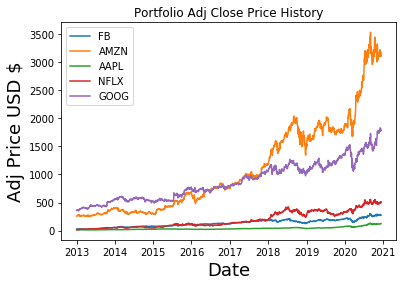

In [14]:
#Let´s visualize the portfolio 
title = "Portfolio Adj Close Price History"

#Get stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)
    
plt.title(title)
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Adj Price USD $", fontsize = 18)
plt.legend(my_stocks.columns.values, loc="upper left")
plt.show()

In [15]:
#Show the daily simple returns
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2020-12-07,0.021022,-0.001448,0.012270,0.035059,-0.004655
2020-12-08,-0.007634,0.006108,0.005091,-0.006049,-0.000511
2020-12-09,-0.019337,-0.023004,-0.020904,-0.037179,-0.018927


In [17]:
#Let´s show the annualized covariance matrix (it determines the relatinship between the asset prices)
#252 ius the number of trading days 
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.119226,0.055293,0.044998,0.056927,0.050594
AMZN,0.055293,0.094452,0.039931,0.063601,0.047996
AAPL,0.044998,0.039931,0.081672,0.035322,0.038687
NFLX,0.056927,0.063601,0.035322,0.211696,0.048925
GOOG,0.050594,0.047996,0.038687,0.048925,0.066226


In [18]:
#En la diagonal tenemos las varianzas de cada stock ademas de todas las covarianzas.
#Recordamos que la raiz de esas varianzas es la desviación tipica
#Las desv tipica que en finanzas es la volatilidad

In [19]:
#Let´s calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.06151282370479426

In [20]:
#Calculate the portfolio volatility (standard deviation)
port_volatility = np.sqrt(port_variance)
port_volatility

0.2480177890894003

In [21]:
#Let´s calculate the annual portfolio return 
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.3586937605263577

In [24]:
#Show the expected annual return, volatility (risk) and variance
percent_var = str(round(port_variance, 2)* 100) + "%"
percent_vols = str(round(port_volatility, 2)* 100) + "%"
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)* 100) + "%"

print("Expected annual return: " + percent_ret)
print("Annual volatility / risk: " + percent_vols)
print("Annual variance: " + percent_var)

Expected annual return: 36.0%
Annual volatility / risk: 25.0%
Annual variance: 6.0%


In [25]:
#Estos numeros no estan mal, pero podemos optimizarlos, teniendo un mejor return para el mismo risk. 

In [26]:
!pip install PyPortfolioOpt

     |████████████████████████████████| 48 kB 6.3 MB/s eta 0:00:011
     |████████████████████████████████| 3.1 MB 9.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 42.1 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 158 kB 28.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 23.9 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 34.9 MB/s eta 0:00:01
  Created wheel for cvxpy: filename=cvxpy-1.1.7-cp38-cp38-macosx_10_9_x86_64.whl size=829661 sha256=6357a0e6e2e1d500bbe40de0f71a31d9ebfdbfbfe41e81c140edde9aabc62af4
  Stored in directory: /Users/Jaime/Library/Caches/pip/wheels/51/a4/25/decef34c7e5328b040c66f7bc3ca49bd6a22dae43f0230e848
  Created wheel for scs: filename=scs-2.1.2-cp38-cp38-macosx_10_14_x86_64.whl size=119338 sha256=3bccebcc7ecdea7bcfb52746d209ae898f3ab06c1fceb1fd73fa442318c0a4be
  Stored in d

In [27]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [29]:
#Portfolio Optimization 

#Let´s calculate the expected returns and the annualised sample covariance matrix of asset returns 
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#Let´s optimize for max sharpe ratio. Way to describe how much excess return you receive for an extra amount of volatility.
#Measures the performance of an investment, compared with an investment which is risk free (bonds, tesoro, ...)
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
#This is a helper method to clean the row weights(es un redondeo que puedes editar min 32)
#It´s going to get rid of the stocks that we don´t need to get to the optimal portfolio. 
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('FB', 0.09269), ('AMZN', 0.30318), ('AAPL', 0.26122), ('NFLX', 0.34291), ('GOOG', 0.0)])
Expected annual return: 41.6%
Annual volatility: 27.4%
Sharpe Ratio: 1.45


(0.41638209726369185, 0.27377837426757445, 1.4478210644800305)

In [30]:
#Si sumamos los pesos esto debería dar 1
0.09269 + 0.30318 + 0.26122 + 0.34291

1.0

In [32]:
#Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation , leftover = da.lp_portfolio()
print("Discrete allocation: ", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation:  {'FB': 6, 'AMZN': 1, 'AAPL': 33, 'NFLX': 11}
Funds remaining: $667.33
